# __SCALLING__

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Transform numerical data into same range (typically small). 
<br> Some method may work best with scaling
ex. KNN, Neural Network, Linear Model.
<br>
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [2]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


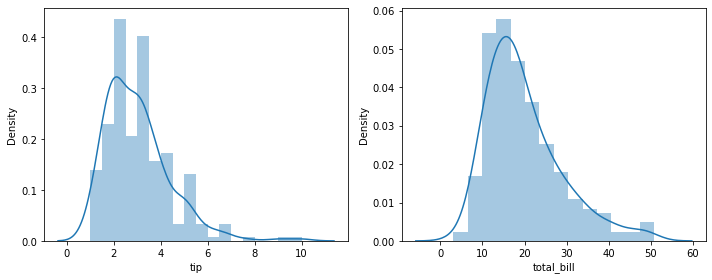

In [3]:
#2. memvisualisasikan data untuk melihat range data

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(tips['tip'])

plt.subplot(1,2,2)
sns.histplot(tips['total_bill'])

plt.tight_layout()
plt.show() 

#terlihat beda range data, perlu dilakukan scalling

In [4]:
#Melihat describe data 

tips[['tip', 'total_bill']].describe()
#(terlihat nilai min dan max kedua variabel jaduh berbeda)

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [5]:
#Import Library

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
#Menentukan variabel X (best practice)

X = tips[['tip', 'total_bill']]

> ## __MinMax Scaler__

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [8]:
#Melakukan scaling

minmax = MinMaxScaler() #membuat objek
X_minmax = minmax.fit_transform(X) #pake fit&transform karena tidak pake data splitting 
X_minmax = pd.DataFrame(X_minmax, columns=X.columns) #dijadikan df
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [9]:
#Melihat describe hasil scaling minmax

X_minmax.describe()
#min selalu 0, max selalu 1

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


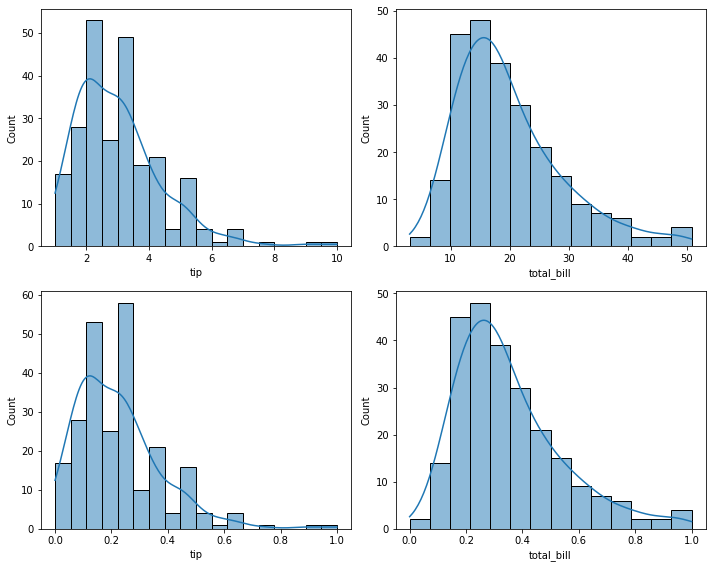

In [10]:
#Membandingkan plot data with scaling dan without scaling

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(2,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(2,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.tight_layout()
plt.show()

from illustration above, you can see that min max scaler method has transformed each varables into range 0 to 1.

> ## __Standard Scaler__


\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}


In [11]:
#Melakukan scalling

standard = StandardScaler() #membuat objek
X_standard = standard.fit_transform(X) #scalling
X_standard = pd.DataFrame(X_standard, columns=X.columns) #dijadikan dataframe
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [12]:
#Melakukan analisis deskriptif

X_standard.describe()
#mean mendekati 0, std mendekati 1
#range diatas 2,5 biasanya outlier

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


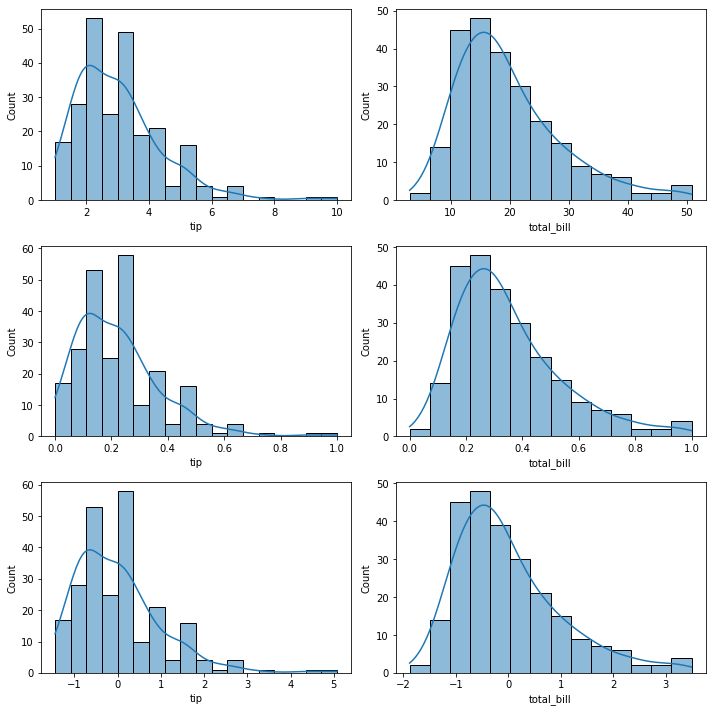

In [13]:
#Membuat plot perbandingan data without scaling, scaling with minmax, and scaling with standard

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(3,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(3,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(3,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(3,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(3,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.tight_layout()
plt.show()

Terlihat dari grafik, bentuknya sama tapi hanya berbeda di range data

> ## __Robust Scaler__

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}
​
​


In [14]:
#Melakukan scaling

robust = RobustScaler() #membuat objek
X_robust = robust.fit_transform(X) 
X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [15]:
#melakukan analisis deskripstif

X_robust.describe()
#tidak ada range yg dijanjikan robust, tapi mediannya mendekati nol
#terlihat di row 50%

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


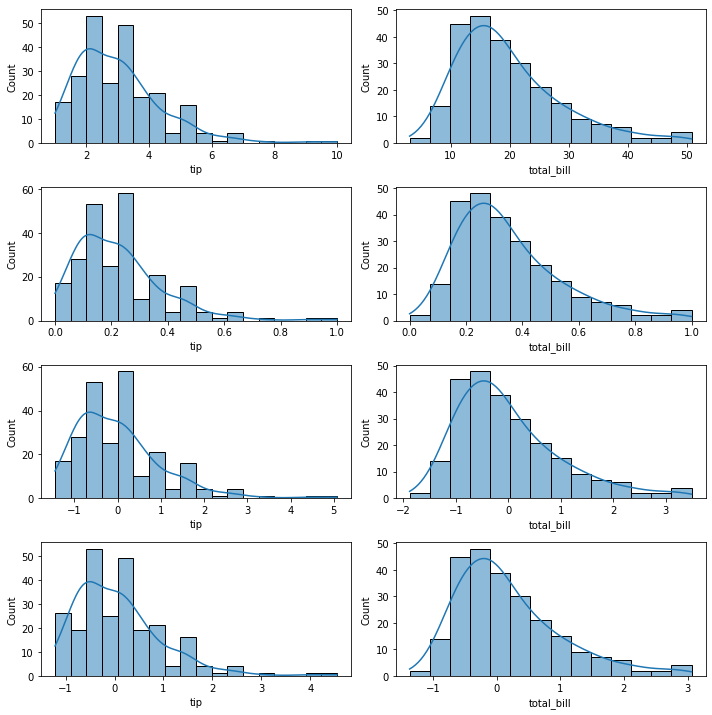

In [16]:
#Membuat plot perbandingan data without scaling, scaling with minmax, standard, dan robust

plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(4,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(4,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(4,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(4,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(4,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.subplot(4,2,7)
sns.histplot(X_robust['tip'], kde=True)
plt.subplot(4,2,8)
sns.histplot(X_robust['total_bill'], kde=True)

plt.tight_layout()
plt.show()